# Repliement spectral

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
def la(fe):
    
    # Paramètres de la simulation
    fo = 440
    d  = 0.1
    
    # Signal parfait (= très fortement échantillonné)
    Te = 1/16000
    t0 = np.arange(0, d, Te)
    x0 = np.sin(2*np.pi*fo*t0)
    
    # Signal échantillonné, mais long
    D = 5
    Te = 1/fe
    t = np.arange(0, D, Te)
    N = len(t)
    x = np.sin(2*np.pi*fo*t)
    
    # Spectre
    X = fft.fftshift(fft.fft(x))
    k = np.arange(N) - np.floor(N/2)
    f = k/(N*Te)

    # Affichage
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    
    # Signal sur 100 ms
    ax[0].plot(t*1e3, x, 'C0')
    ax[0].set_xlim([0, 100])
    ax[0].set_xlabel("t (ms)")
    
    # Zoom sur 10 ms avec signal parfait
    ax[1].plot(t0*1e3, x0, 'gray')
    ax[1].plot(t*1e3,  x,  'C0o-')
    ax[1].set_xlim([0, 10])
    ax[1].set_xlabel("t (ms)")
    
    # Module du spectre
    ax[2].plot(f, np.abs(X), 'C0')
    ax[2].set_xlim([-650, 650]);
    ax[2].set_xlabel("f (Hz)")
    
    # Interpolation du signal pour avoir une fréquence d'échantillonnage suffisamment grande
    fs = 8000
    M = int((D*fs-N)/2)
    Y = np.concatenate([np.zeros(M), X, np.zeros(M)])
    y = np.real(fft.ifft(fft.ifftshift(Y)))*2
    
    # Lecture du signal audio
    display(Audio(y, rate=fs, autoplay=False))

Trois échantillonnage d'une sinusoïde à 440 Hz sont représentés ici.
Pour chaque fréquence d'échantillonnage, le signal est représenté sur 100 ms et 10 ms (ainsi que les points d'échantillonnage et, en vert, le signal analogique).
Le module du spectre est également affiché pour observer le repliement spectral.

**Échantillonnage à 8000 Hz**

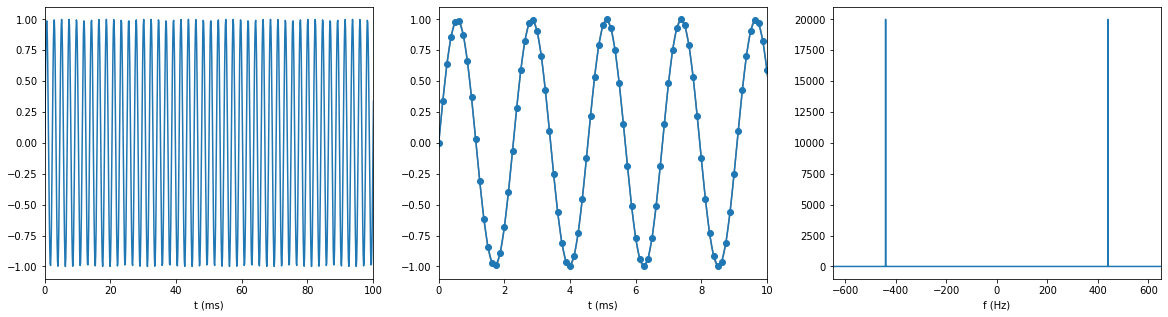

In [3]:
la(8000)

**Échantillonnage à 1000 Hz**

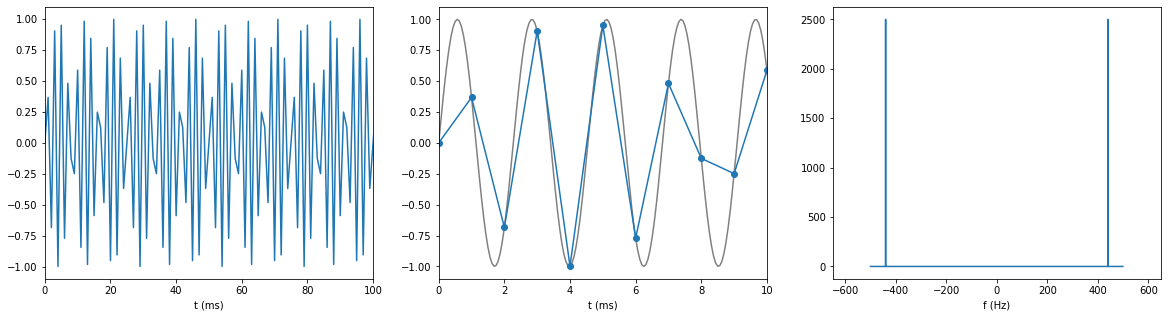

In [4]:
la(1000)

**Échantillonnage à 700 Hz**

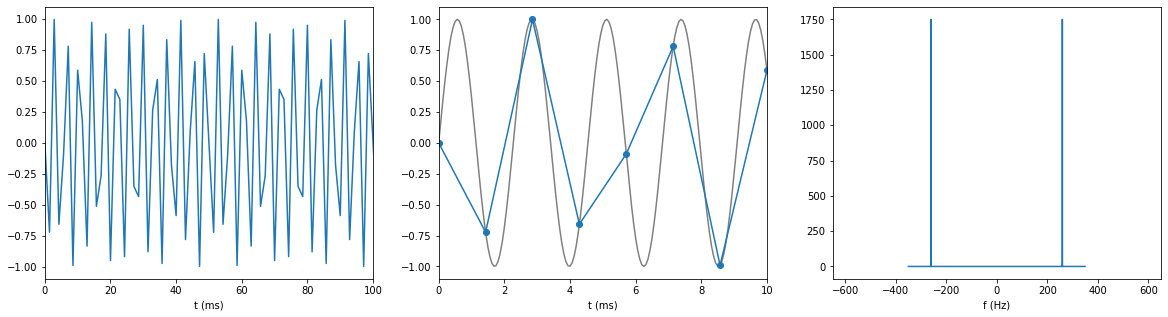

In [5]:
la(700)